In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
train_data = pd.read_csv('spacetitanic_train.csv')
test_data = pd.read_csv('spacetitanic_test.csv')

### EDA

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [7]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [9]:
# 基本統計量の確認
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


サービス系は一部の人のみ利用？？？

<AxesSubplot:xlabel='Age', ylabel='Density'>

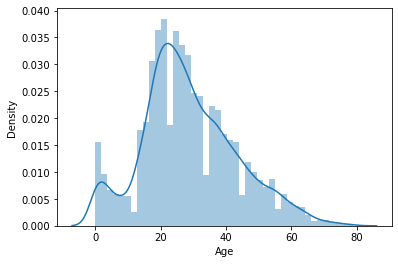

In [14]:
# 年齢の分布を可視化してみる
sns.distplot(train_data['Age'])

<AxesSubplot:xlabel='Transported', ylabel='Age'>

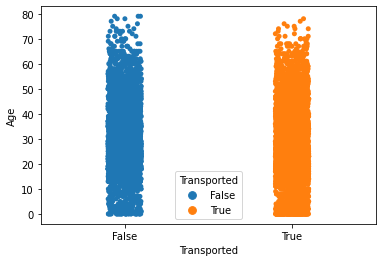

In [15]:
sns.stripplot(x='Transported', y='Age', data=train_data, hue='Transported')

この可視化方法が適切かわかりませんが年齢はあまり関係ないのでしょうか

(array([0, 1, 2]),
 [Text(0, 0, 'Europa'), Text(1, 0, 'Earth'), Text(2, 0, 'Mars')])

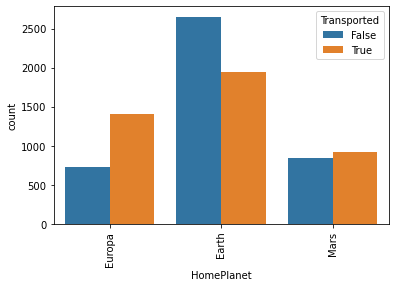

In [10]:
# HomePlanetごとのTransportedの割合
sns.countplot(x='HomePlanet',hue='Transported', data=train_data)
plt.xticks(rotation=90)

惑星ヨーロッパ、、、？

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

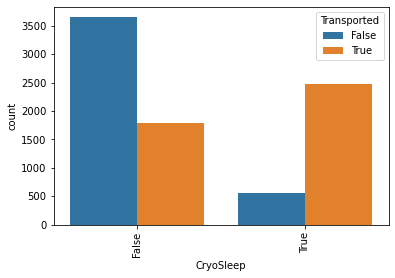

In [11]:
#  CryoSleepかどうかとTransportedの割合
sns.countplot(x='CryoSleep',hue='Transported', data=train_data)
plt.xticks(rotation=90)

昏睡状態の人が異次元に行きがち

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

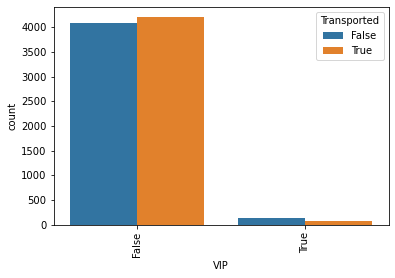

In [13]:
# VIPかどうかとTransportedの割合
sns.countplot(x='VIP',hue='Transported', data=train_data)
plt.xticks(rotation=90)

VIPかどうかはあまり関係なさそう

### データクレンジング

In [16]:
# 欠損値の確認
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

結構欠損値あるので以下のことをやってみる。　　　
- 年齢の欠損値を中央値27で補完する
- サービス系の欠損値を0で補完する　　　
- bool値を0,1に変換

In [17]:
# Ageの欠損値は中央値27で、サービス系の欠損値は0で補完
train_data = train_data.fillna({'Age':27, 'RoomService':0, 'FoodCourt':0, 'ShoppingMall':0, 'Spa':0, 'VRDeck':0})
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [18]:
# bool値を値に変換(True:1,False:0)
train_data[['Transported', 'CryoSleep', 'VIP']] = train_data[['Transported', 'CryoSleep', 'VIP']]*1
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [22]:
# 欠損値が含まれる行を削除したらデータ数どうなるかみてみる
data = train_data.copy()
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7559 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7559 non-null   object 
 1   HomePlanet    7559 non-null   object 
 2   CryoSleep     7559 non-null   object 
 3   Cabin         7559 non-null   object 
 4   Destination   7559 non-null   object 
 5   Age           7559 non-null   float64
 6   VIP           7559 non-null   object 
 7   RoomService   7559 non-null   float64
 8   FoodCourt     7559 non-null   float64
 9   ShoppingMall  7559 non-null   float64
 10  Spa           7559 non-null   float64
 11  VRDeck        7559 non-null   float64
 12  Name          7559 non-null   object 
 13  Transported   7559 non-null   int64  
dtypes: float64(6), int64(1), object(7)
memory usage: 885.8+ KB


1000行くらい減ってしまいましたが学習データの量としては十分ではないでしょうか